<div style="display: flex;
 align-items: center;
 justify-content:space-around;
 flex-direction: row;
 ">

 <img src="https://avatars.githubusercontent.com/u/100109594?v=4" width="200px">
<h2 style="color:orange; text-align: center;"><b><i>Sharshekeev Dastan AIN-2-21</i></b></h3>

</div>

<h1 style="color:brown;"><b>Оценка и улучшение качества модели.</b></h1>

# **Задание 2**
---
Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

In [ ]:
!pip install mglearn

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.linear_model import LogisticRegression

In [ ]:
# Загрузка датасета
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

* *Применение алгоритма улучшения качества "перекрестная проверка"*
---
```
cross_val_score
```
---







Cross Val scores: [0.91860465 0.95294118 0.91764706 0.95294118 0.97647059]
Средняя точность перекрестной проверки: 0.94


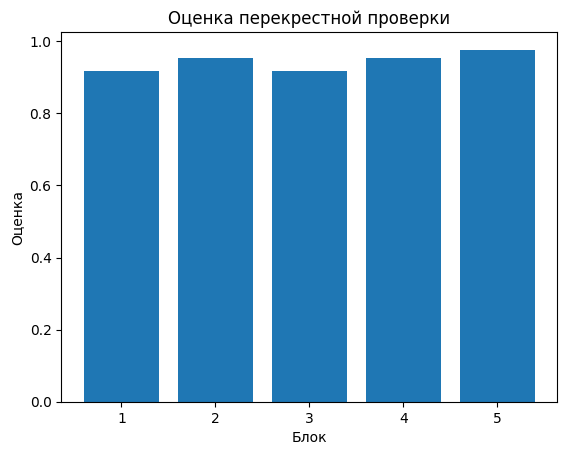

In [ ]:
# Создание модели методом случайного леса
model = RandomForestClassifier(random_state=42)

# генератор разбиений KFold
kFold = KFold(n_splits=5)

scores = cross_val_score(model,X_train,y_train,cv=kFold)

print(f'Cross Val scores: {scores}')
print("Средняя точность перекрестной проверки: {:.2f}".format(scores.mean()))

# Построение графика для отображения результатов перекрестной проверки
fig, ax = plt.subplots()
ax.bar(range(1, len(scores) + 1), scores)
ax.set_title('Оценка перекрестной проверки')
ax.set_xlabel('Блок')
ax.set_ylabel('Оценка')
plt.show()

* Решетчатый поиск
---
```
GridSearchCV
```
---

In [ ]:
# параметры
param_grid = {
    'n_estimators': [10, 50, 100, 200], # количество деревьев в лесу
    'max_depth': [None, 10, 20, 30], # максимальная глубина дерева
    'min_samples_split': [2, 5, 10] # мин. количество образцов
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшие параметры и оценка
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучшая оценка: {grid_search.best_score_}')
print(f'Правильность на тестовом наборе: {grid_search.score(X_test,y_test)}')
print(f'Наилучшая модель: {grid_search.best_estimator_}')


Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Лучшая оценка: 0.9484268125854994
Правильность на тестовом наборе: 0.965034965034965
Наилучшая модель: RandomForestClassifier(n_estimators=50, random_state=42)


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_train)
print(f'Матрица ошибок:\n{confusion_matrix(y_train, y_pred)}')
print(f'Точность: {accuracy_score(y_train, y_pred)}')

Матрица ошибок:
[[159   0]
 [  0 267]]
Точность: 1.0


In [ ]:
import pandas as pd
grid_res = pd.DataFrame(grid_search.cv_results_)
display(grid_res.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019136,0.000335,0.001509,0.000052,None,2,10,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.930233,0.964706,0.905882,0.941176,0.976471,0.943694,0.025032,41
1,0.095782,0.005067,0.004162,0.001141,None,2,50,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.918605,0.964706,0.929412,0.952941,0.976471,0.948427,0.021554,1
2,0.184473,0.006619,0.005920,0.000364,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.918605,0.964706,0.929412,0.952941,0.976471,0.948427,0.021554,1
3,0.450224,0.080291,0.021703,0.020095,None,2,200,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.918605,0.964706,0.917647,0.952941,0.976471,0.946074,0.024004,17
4,0.019186,0.000086,0.001428,0.000036,None,5,10,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.930233,0.964706,0.917647,0.952941,0.976471,0.948399,0.021681,9


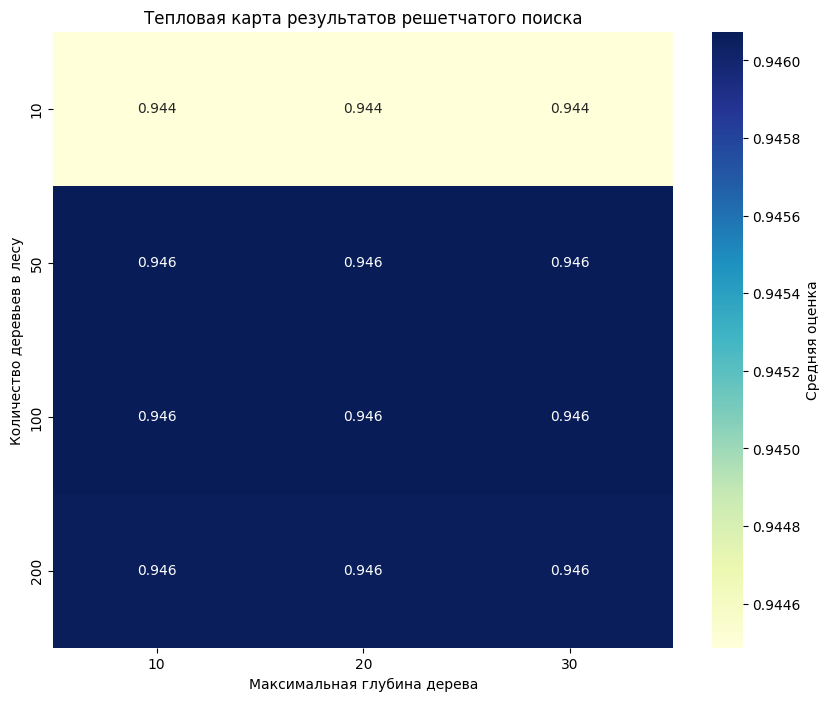

In [ ]:
import seaborn as sns

# Извлечение значений, необходимых для создания тепловой карты
heatmap_data = grid_res.groupby(['param_n_estimators', 'param_max_depth'])['mean_test_score'].mean().unstack()

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Средняя оценка'})
plt.title('Тепловая карта результатов решетчатого поиска')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Количество деревьев в лесу')
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f'Точность: {accuracy}')
print(f'Полнота: {recall}')
print(f'F1-мера: {f1}')

Точность: 1.0
Полнота: 1.0
F1-мера: 1.0


# **Задание 3**
---
Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.
1. Создать свой датасет с категориальными данными (1000 строк), которые
содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint)
2. Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (например, от 30 до 65), vacation_prefer – тип отдыха (например, Shopping или Beach holiday), transport_prefer – тип транспорта (например, auto, plane), target – город, в котором проведем отпуск (например, London, Moscow)
3. Преобразовать категориальные данные в числовые, используя panadas.get_dummies.
4. Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)
5. Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)
6. Проверить оценку модели.
7. Сделать предсказание на случайных данных.
8. Улучшить модель согласно примеров лекций 9-10 и материала лабораторной работы


In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Установка seed для воспроизводимости результатов
random.seed(42)

# Создание датасета
data = {
    'salary': [random.randint(30000, 80000) for _ in range(1000)],
    'city': [random.choice(['Bishkek', 'Moscow', 'London', 'Paris']) for _ in range(1000)],
    'age': [random.randint(30, 65) for _ in range(1000)],
    'vacation_prefer': [random.choice(['Shopping', 'Beach holiday']) for _ in range(1000)],
    'transport_prefer': [random.choice(['auto', 'plane']) for _ in range(1000)],
    'target': [random.choice(['Bishkek', 'Moscow', 'London', 'Paris']) for _ in range(1000)]
}

df = pd.DataFrame(data)

display(df.head())

,salary,city,age,vacation_prefer,transport_prefer,target
0,71905,Paris,50,Beach holiday,auto,Bishkek
1,37296,London,42,Beach holiday,auto,London
2,31639,Moscow,40,Shopping,auto,Paris
3,78598,Bishkek,61,Beach holiday,auto,Paris
4,48024,London,62,Shopping,plane,Bishkek


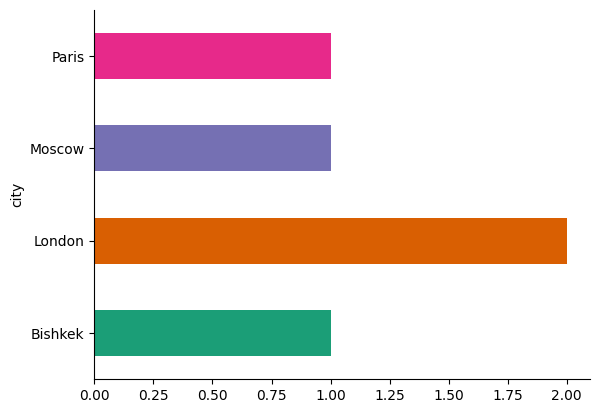

In [ ]:
_df_2.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

display(df_encoded.head())

,salary,age,target,city_Bishkek,city_London,city_Moscow,city_Paris,vacation_prefer_Beach holiday,vacation_prefer_Shopping,transport_prefer_auto,transport_prefer_plane
0,71905,50,Bishkek,0,0,0,1,1,0,1,0
1,37296,42,London,0,1,0,0,1,0,1,0
2,31639,40,Paris,0,0,1,0,0,1,1,0
3,78598,61,Paris,1,0,0,0,1,0,1,0
4,48024,62,Bishkek,0,1,0,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)


In [ ]:
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.26


In [ ]:
# Пример случайных данных для предсказания
random_data = {
    'salary': [50000],
    'age': [40],
    'city_Bishkek': [1],
    'city_London': [0],
    'city_Moscow': [0],
    'city_Paris': [0],
    'vacation_prefer_Beach holiday': [1],
    'vacation_prefer_Shopping': [0],
    'transport_prefer_auto': [1],
    'transport_prefer_plane': [0]
}

# Преобразование в DataFrame
random_df = pd.DataFrame(random_data)

# Предсказание
prediction = model.predict(random_df)
print(f'Predicted Target: {prediction[0]}')

Predicted Target: Bishkek


In [ ]:
del model

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Лучшая оценка: 0.27875
Accuracy на тестовом наборе: 0.26


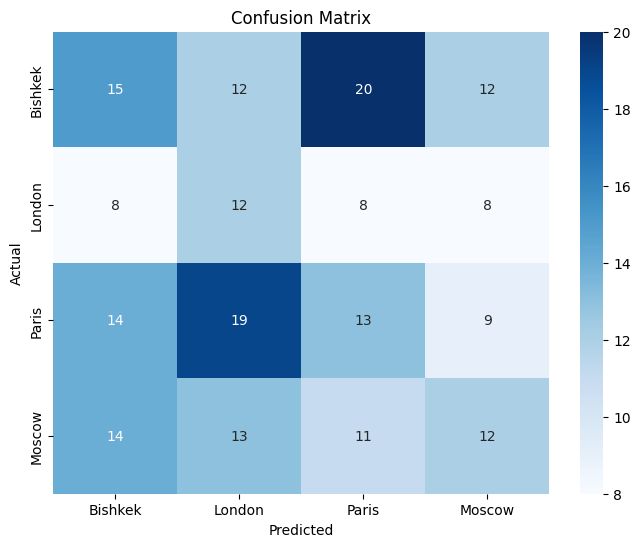

Classification Report:
               precision    recall  f1-score   support

     Bishkek       0.29      0.25      0.27        59
      London       0.21      0.33      0.26        36
      Moscow       0.29      0.24      0.26        50
       Paris       0.25      0.24      0.24        55

    accuracy                           0.26       200
   macro avg       0.26      0.27      0.26       200
weighted avg       0.27      0.26      0.26       200



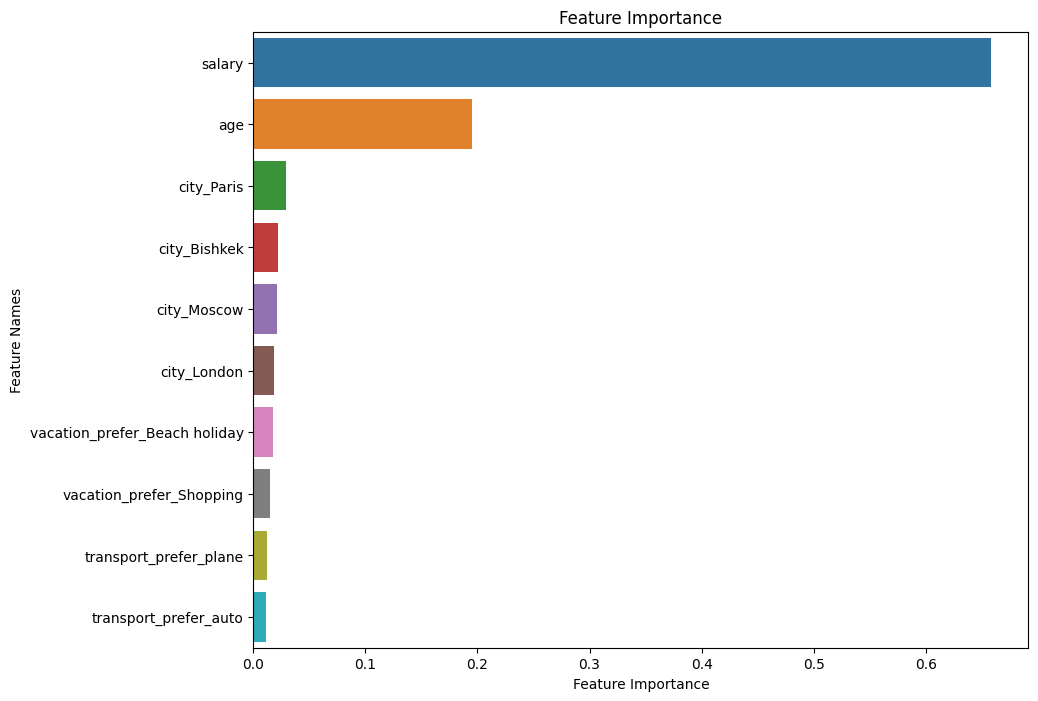

In [ ]:
# Выбор модели классификатора (GradientBoostingClassifier)
model = GradientBoostingClassifier(random_state=42)

# Обучение и оценка модели с использованием решетчатого поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшие параметры и оценка
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучшая оценка: {grid_search.best_score_}')

# Использование лучшей модели
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy на тестовом наборе: {accuracy}')

# Визуализация результатов
# матрица неточностей
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=df_encoded['target'].unique())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df_encoded['target'].unique(), yticklabels=df_encoded['target'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Отчет о классификации
print('Classification Report:\n', classification_report(y_test, y_pred))

# Feature Importance (если модель поддерживает)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = X.columns
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # Сортировка датафрейма в порядке убывания в соответствии с важностью объекта
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Plot отсортированного датафрейма
    plt.figure(figsize=(10, 8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title('Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.show()